In [ ]:
!pip install ffmpeg-python opencv-python torch numpy

In [ ]:
import torch
import random
import torchvision
import torch.nn.functional as F
from torchvision import transforms

import cv2
import numpy as np
import ffmpeg

# for onve video

In [ ]:
# Path to input video and output video
input_video_path = 'ex_1.mp4'
output_video_path = 'bbb.mp4'

# Load video using OpenCV
cap = cv2.VideoCapture(input_video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output file

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Output video writer
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Coordinates where the patch will be placed
patch_x, patch_y = 50, 50  # Example: top-left corner at (50, 50)

In [ ]:
fps

30

In [ ]:
# Function to apply the patch to a frame
def apply_patch_to_frame(frame, patch, patch_x, patch_y):
    patch_x, patch_y = random.randint(0, frame.shape[1] - patch.shape[1]), random.randint(0, frame.shape[0] - patch.shape[0])

    frame[patch_y:patch_y + patch.shape[0], patch_x:patch_x + patch.shape[1]] = np.flip(patch, [2])
    return frame

# Process each frame
frame_idx = 0
N = 1
patch = torch.load('/content/25_64_num_epoch_3_ViT-SigLIP_so_patch_imgs_10203 (1).pt').permute(1, 2, 0)

sigmoid = lambda x: 1/(1 + np.exp(-x))
to_rgb = lambda x: (x * 255).byte()

patch = to_rgb(sigmoid(patch)).numpy()

while cap.isOpened():

    ret, frame = cap.read()
    if not ret:
        break

    # Apply patch to every Nth frame
    if frame_idx % N == 0:
        frame = apply_patch_to_frame(frame, patch, patch_x, patch_y)

    # Write the frame to the output video
    out.write(frame)
    frame_idx += 1

# Release everything when job is done
cap.release()
out.release()

print(f"Corrupted video saved as {output_video_path}")


  patch = torch.load('/content/25_64_num_epoch_3_ViT-SigLIP_so_patch_imgs_10203 (1).pt').permute(1, 2, 0)



Corrupted video saved as bbb.mp4


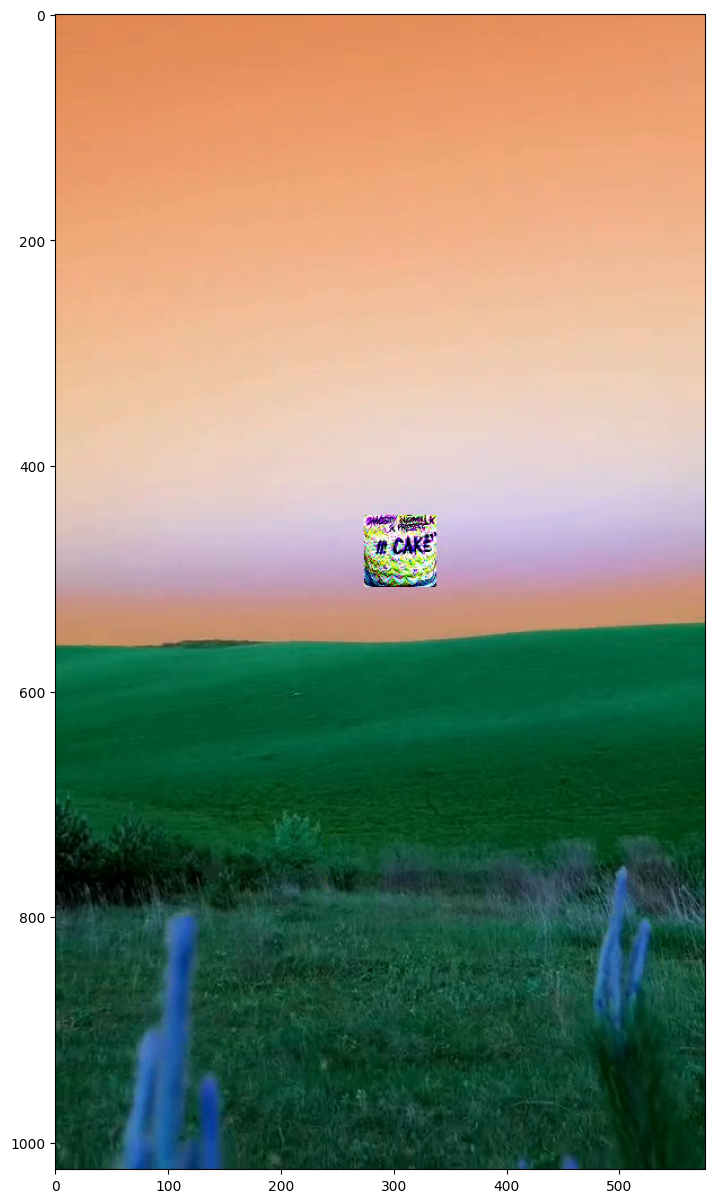

In [ ]:
cap = cv2.VideoCapture(output_video_path)
c = 0
plt.figure(figsize=(15, 15))

while cap.isOpened():
    ret, frame = cap.read()
    if c == 18:
        plt.imshow(frame)
        break

    c += 1


# for dataset of videos

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
dir_path = '/content/change_tiktok_00_01'

In [ ]:
import tarfile
import os
import shutil

def extract_tarfile(tar_path, extract_path):
    with tarfile.open(tar_path, 'r') as tar:
        tar.extractall(path=extract_path)


# pathes = ["/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/dzen-00000001.tar",
        #   "/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/dzen-00000002.tar"
                    #  ]  # Path to the original .tar file

pathes = ["/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/tiktok-00000000.tar",
          "/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/tiktok-00000001.tar",]



# pathes = ['/content/drive/MyDrive/tiktok-00000000.tar',
        #   '/content/drive/MyDrive/tiktok-00000001.tar']
extract_path = dir_path     # Directory to extract files to

# Step 1: Extract the contents of the .tar file
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

for original_tar_path in pathes:
    extract_tarfile(original_tar_path, extract_path)

In [ ]:
from collections import defaultdict

any_order_files = os.listdir(dir_path)

label_dict = defaultdict(lambda: [0] * 10)
texts = []
c = 0
for i, name in enumerate(any_order_files):
    if name.endswith('.jpg'):
        frame_id = int(name.split('.')[1][-1])
        # label = name.split('_')[1].split('.')[0].strip()
        vid_id = name.split('_')[0].strip()

        label_dict[vid_id][frame_id] = name

texts = []
for vid_id, frames in label_dict.items():
    texts.append(frames[0].split('_')[1].split('.')[0].strip())

In [ ]:
len(label_dict), len(texts)

(200, 200)

convert to the `.mp4` format

In [ ]:
import cv2
import os
from tqdm.notebook import tqdm

In [ ]:
def convert_frames_to_video(frames_dict, output_folder, fps=30):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    for text, (video_name, frame_paths) in tqdm(zip(texts, frames_dict.items())):
        # Load the first frame to get the frame dimensions

        fst_abs_fr_path = os.path.join(dir_path, frame_paths[0])
        first_frame = cv2.imread(fst_abs_fr_path)
        if first_frame is None:
            print(f"Error: Could not read {frame_paths[0]}")
            continue

        frame_height, frame_width, _ = first_frame.shape

        # Define the codec and create VideoWriter object
        output_video_path = os.path.join(output_folder, f"{video_name}_{text}.mp4")
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

        # Write each frame to the video
        for frame_path in frame_paths:
            frame_abs_path = os.path.join(dir_path, frame_path)
            frame = cv2.imread(frame_abs_path)
            if frame is None:
                print(f"Error: Could not read {frame_path}")
                continue

            out.write(frame)  # Add frame to video

        # Release the video writer
        out.release()



In [ ]:
# Folder to save the output videos
output_folder = '/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/tiktok mp4 vids'

# Convert frames to video
convert_frames_to_video(label_dict, output_folder, fps=30)

0it [00:00, ?it/s]

# for pathces

In [ ]:
!pip install ffmpeg-python opencv-python torch numpy

In [ ]:
import cv2
import torch
import random
import numpy as np
from tqdm.notebook import tqdm
import os

In [ ]:
class VideoProcessor:
    def __init__(self, patch_path, frames_mask: list):
        self.patch_path = patch_path
        self.frames_mask = frames_mask
        self.patch = self.load_patch(self.patch_path)

    def load_patch(self, patch_path):
        # Load and preprocess the patch
        patch = torch.load(patch_path).permute(1, 2, 0)  # Assuming patch is stored as torch tensor
        patch = self.to_rgb(self.sigmoid(patch)).numpy()

        return patch

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def to_rgb(x):
        return (x * 255).byte()

    def apply_patch_to_frame(self, frame):
        # Randomly choose a position to place the patch
        patch_x = random.randint(0, frame.shape[1] - self.patch.shape[1])
        patch_y = random.randint(0, frame.shape[0] - self.patch.shape[0])

        # Place the flipped patch on the frame
        frame[patch_y:patch_y + self.patch.shape[0], patch_x:patch_x + self.patch.shape[1]] = np.flip(self.patch, axis=2)
        return frame

    def update_video_paths(self, input_video_path, output_video_path):
        self.input_video_path = input_video_path
        self.output_video_path = output_video_path

    def process_video(self):
        # Load video
        cap = cv2.VideoCapture(self.input_video_path)
        if not cap.isOpened():
            raise ValueError(f"Cannot open video file: {self.input_video_path}")

        # Get video properties
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Set up output video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(self.output_video_path, fourcc, fps, (frame_width, frame_height))

        # Process frames
        frame_idx = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Apply patch to every Nth frame
            if self.frames_mask[frame_idx]:
                frame = self.apply_patch_to_frame(frame)

            # Write the frame to the output video
            out.write(frame)
            frame_idx += 1

        # Release resources
        cap.release()
        out.release()


def process_multiple_videos(processor, video_paths):
    for idx, (input_video, output_video) in tqdm(enumerate(video_paths)):
        processor.update_video_paths(input_video, output_video)
        processor.process_video()

# for one vid

In [ ]:
# Example usage
patch_file = '/content/25_64_epoch_4_ViT-SigLIP_so_patch_imgs_10203.pt'
frames_mask = [
    # [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
    [1., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
    [1., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
    [1., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
    [1., 0., 0., 1., 1., 1., 0., 1., 1., 0.],
    [1., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
    [1., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
    [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
    # [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
    ]

processor = VideoProcessor(patch_file, frames_mask)

name = 'dzen'
save_dir_path = f'/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/{name} vids/car crash/{name} mp4 vids_{sum(frames_mask)}/'
os.makedirs(save_dir_path, exist_ok=True)

data_dir_path = f'/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/{name} mp4 vids/'

<ipython-input-89-9006be8d0088>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  patch = torch.load(patch_path).permute(1, 2, 0)  # Assuming patch is stored as torch tensor


In [ ]:
# List of tuples containing input/output video paths
video_paths = []
for vid_name in os.listdir(data_dir_path):
    if vid_name.endswith('.mp4'):
        video_paths.append(
            (
                os.path.join(data_dir_path, vid_name),
                os.path.join(save_dir_path, vid_name)
                )
        )


In [ ]:
# !rm -rf "/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/dzen mp4 vids_1"
# !rm -rf "/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/tiktok mp4 vids_1"

In [ ]:
# Process all 200 videos
process_multiple_videos(processor, video_paths)


0it [00:00, ?it/s]

In [ ]:
len(os.listdir("/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/tiktok mp4 vids_1"))

200

# for all vids mask

In [ ]:
import cv2
import torch
import random
import numpy as np
from tqdm.notebook import tqdm
import os

In [ ]:
# Example usage
patch_file = '/content/0_64_asshole_epoch_5_ViT-SigLIP_so_patch_imgs_10203.pt'
frames_mask = [
    # [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
    [1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
    [0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
    [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
    [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
    [0., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
    [0., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
    ]

name = 'dzen'
data_dir_path = f'/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/{name} mp4 vids/'

for fr_mask in tqdm(frames_mask):
    processor = VideoProcessor(patch_file, fr_mask)
    # save_dir_path = f'/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/tiktok vids/car crash'
    save_dir_path = f'/content/drive/MyDrive/Colab_Notebooks/CV/papers/data/HSE_Project_attacks/data/{name} vids/ass/{name} mp4 vids_{sum(fr_mask)}/'
    os.makedirs(save_dir_path, exist_ok=True)


    # List of tuples containing input/output video paths
    video_paths = []
    for vid_name in os.listdir(data_dir_path):
        if vid_name.endswith('.mp4'):
            video_paths.append(
                (
                    os.path.join(data_dir_path, vid_name),
                    os.path.join(save_dir_path, vid_name)
                    )
            )


    # Process all 200 videos
    process_multiple_videos(processor, video_paths)



  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-3-e7279d784c4b>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  patch = torch.load(patch_path).permute(1, 2, 0)  # Assuming patch is stored as torch tensor


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]